In [30]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [31]:
experiment_name = 'no_nn'
path = Path('../../data/results/experiment1')

In [32]:
df = pd.read_csv(path/'best_known.csv')
best_known_fitness = df['fitness'].values
best_known_sumcv = df['sum_constraints'].values

In [33]:
D = 30
runs = 5
nn_window = 5
nn_nf = 4
frequency = 2_000
max_times = 100
total_generations = max_times * frequency + 1000

In [34]:
experiment=1


if experiment==1:
    ab = pd.read_csv(path/'dC_01.csv')['b'].values
    def fitness_func(indiv, b, t): return (indiv.data**2).sum()
    def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)
    
elif experiment==2:
    ab = pd.read_csv(path/'dC_01.csv')['b'].values
    def fitness_func(indiv, b, t): return (indiv.data**2).sum()
    def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)
elif experiment==3:
    ab=[]
    # experiment 3: dynamic fitness function (linear)
    def fitness_func(indiv, b, t): return ((indiv.data + 0.1*t)**2).sum()
    def constraint_func(indiv, b, t): return 0
    
else:
    ab=[]
# experiment 4: dynamic fitness function (x-sin(pi/2*t))^2
    def fitness_func(indiv, b, t): return ((indiv.data-np.sin(np.pi/2*t))**2).sum()
    def constraint_func(indiv, b, t): return 0

Total time: 03:37
SpeedMetric(success rate): 0.0000
ModifiedOfflineError: 1.9229
OfflineError: 1.8974
AbsoluteRecoverRate: 0.9783


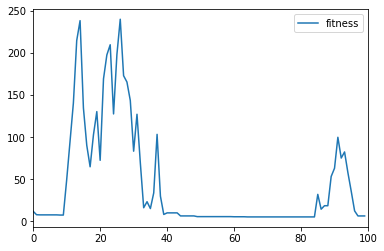

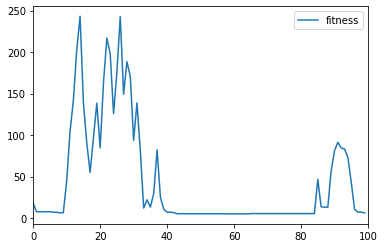

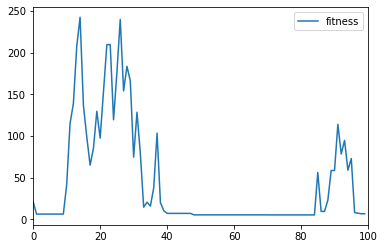

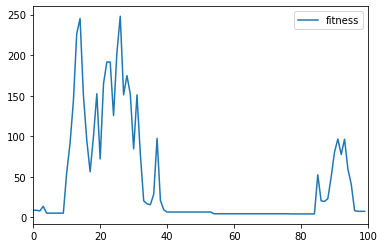

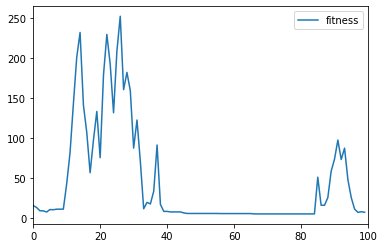

In [35]:
results = {'mof':[], 'sr':[], 'nfe':[], 'fitness':[], 'sumcv':[], 'arr':[]}

for run in range(runs):
    population = Population.new_random(dimension=D)

    speed_metric = partial(SpeedMetric, threadhold=0.2)

    opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                       max_times=max_times, frequency=frequency, callbacks=[OnChangeRestartPopulation],
                       metrics=[speed_metric, ModifiedOfflineError, OfflineError, AbsoluteRecoverRate],
                       optimal_fitness_values=best_known_fitness, optimal_sum_constraints=best_known_sumcv)
    # opt.state_dict

    opt.run(total_generations)

#     df = pd.DataFrame({'fitness':opt.recorder.best_times_fitness, 'sum_constraints':opt.recorder.best_times_constraints})

#     opt.recorder.plot()
#     plt.plot()

#     opt.recorder.plot_metrics()
#     plt.plot()

    # saving results
    results['mof'].append(opt.modified_offline_error.metrics)
    results['arr'].append(opt.absolute_recover_rate.metrics)
    results['sr'].append(opt.speed_metric.metrics)
    results['nfe'].append(opt.speed_metric.speeds)
    results['fitness'].append(opt.recorder.best_times_fitness)
    results['sumcv'].append(opt.recorder.best_times_constraints)    

In [36]:
pd.DataFrame({'mof':results['mof']}).to_csv(path/f'{experiment_name}_mof.csv', index=False)
pd.DataFrame({'sr':results['sr']}).to_csv(path/f'{experiment_name}_sr.csv', index=False)
pd.DataFrame(results['nfe']).to_csv(path/f'{experiment_name}_nfe.csv', index=False)
pd.DataFrame(results['fitness']).to_csv(path/f'{experiment_name}_fitness.csv', index=False)
pd.DataFrame(results['sumcv']).to_csv(path/f'{experiment_name}_sumcv.csv', index=False)
pd.DataFrame(results['arr']).to_csv(path/f'{experiment_name}_arr.csv', index=False)